In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from imblearn.under_sampling import RandomUnderSampler

# Processamento


In [35]:
def load_data(filepath):
    return pd.read_csv(filepath)

In [36]:
def excluir_colunas_vazias(df, limite=80):
    
    percentual_vazio = df.isnull().mean() * 100
    colunas_a_remover = percentual_vazio[percentual_vazio > limite].index
    df_sem_colunas_vazias = df.drop(columns=colunas_a_remover)
    
    if len(colunas_a_remover) > 0:
        print(f"Colunas removidas (com mais de {limite}% de dados vazios):")
        print(colunas_a_remover)
    
    return df_sem_colunas_vazias

In [37]:
def preencher_com_media(df):
   
    for coluna in df.columns:
        if pd.api.types.is_numeric_dtype(df[coluna]):
            media_coluna = df[coluna].mean()
            df[coluna].fillna(media_coluna, inplace=True)
            print(f"Preenchendo a coluna '{coluna}' com a média ({media_coluna})")
    return df

In [38]:
def feature_selection_nn(df, n_features=15):

    df = df.dropna().copy()
    X = df.select_dtypes(include=[np.number]) 
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    selector = RFE(estimator=model, n_features_to_select=n_features, step=1)
    selector = selector.fit(X_scaled, np.ones(X_scaled.shape[0]))  
    selected_features = X.columns[selector.support_].tolist()
    
    print("Atributos selecionados:", selected_features)
    
    return selected_features


# Usando as funções

In [39]:
if __name__ == "__main__": 
    import os
    filepath = r'C:\Users\annab\OneDrive\Documentos\GitHub\Colabs\RECPAD\Processamento\df_processed'
    
    if not os.path.exists(filepath):
        raise FileNotFoundError(f"O arquivo especificado não foi encontrado: {filepath}")
    
    df = load_data(filepath)

    df_processed = excluir_colunas_vazias(df, limite=80)

    selected_features = feature_selection_nn(df_processed, n_features=16)
    df_selected = df_processed[selected_features]
    df_final = preencher_com_media(df_selected)

    print("Atributos selecionados:", selected_features)
    print(df_final.head())

Colunas removidas (com mais de 80% de dados vazios):
Index(['CODANOMAL', 'IDADEPAI'], dtype='object')
Atributos selecionados: ['ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'DTULTMENST', 'CONSPRENAT', 'MESPRENAT', 'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'PARIDADE', 'CLASSE']
Preenchendo a coluna 'ESCMAE2010' com a média (2.908573634072315)
Preenchendo a coluna 'SERIESCMAE' com a média (4.069756606303585)
Preenchendo a coluna 'DTNASCMAE' com a média (15694128.114968793)
Preenchendo a coluna 'RACACORMAE' com a média (3.3158497957004864)
Preenchendo a coluna 'QTDGESTANT' com a média (1.2429323587590126)
Preenchendo a coluna 'QTDPARTNOR' com a média (0.7146820561312524)
Preenchendo a coluna 'QTDPARTCES' com a média (0.32442993819453114)
Preenchendo a coluna 'DTULTMENST' com a média (15664020.507253477)
Preenchendo a coluna 'CONSPRENAT' com a média (8.579044997957393)
Preenchendo a coluna 'MESPRENAT' com a média (4.64077222047

C:\Users\annab\AppData\Local\Temp\ipykernel_19580\2006828257.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(media_coluna, inplace=True)
C:\Users\annab\AppData\Local\Temp\ipykernel_19580\2006828257.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[coluna].fillna(media_coluna, inplace=True)


In [40]:
df['MESPRENAT']

0         1.0
1         3.0
2         2.0
3         1.0
4         2.0
         ... 
515639    1.0
515640    3.0
515641    4.0
515642    1.0
515643    2.0
Name: MESPRENAT, Length: 515644, dtype: float64

In [41]:
df_majority = df_final[df_final['CLASSE'] == 0]
df_minority = df_final[df_final['CLASSE'] == 1]

df_minority_test = df_minority.sample(frac=0.2, random_state=42)
df_majority_test = df_majority.sample(n=df_minority_test.shape[0], random_state=42)
test_df = pd.concat([df_majority_test, df_minority_test])

df_majority_train = df_majority.drop(df_majority_test.index)
df_minority_train = df_minority.drop(df_minority_test.index)
train_df = pd.concat([df_majority_train, df_minority_train])

In [42]:
df_majority_train = train_df[train_df['CLASSE'] == 0]
df_minority_train = train_df[train_df['CLASSE'] == 1]

df_minority_valid = df_minority_train.sample(frac=0.1, random_state=42)
df_majority_valid = df_majority_train.sample(n=df_minority_valid.shape[0], random_state=42)

validation_df = pd.concat([df_majority_valid, df_minority_valid])

df_majority_train = df_majority_train.drop(df_majority_valid.index)
df_minority_train = df_minority_train.drop(df_minority_valid.index)
train_df = pd.concat([df_majority_train, df_minority_train])

In [43]:
print(f"Tamanho do conjunto de treino: {train_df.shape}")
print(f"Tamanho do conjunto de validação: {validation_df.shape}")
print(f"Tamanho do conjunto de teste: {test_df.shape}")

Tamanho do conjunto de treino: (483732, 16)
Tamanho do conjunto de validação: (9118, 16)
Tamanho do conjunto de teste: (22794, 16)


In [44]:
test_df['CLASSE'].value_counts()

CLASSE
0    11397
1    11397
Name: count, dtype: int64

In [45]:
validation_df['CLASSE'].value_counts()

CLASSE
0    4559
1    4559
Name: count, dtype: int64

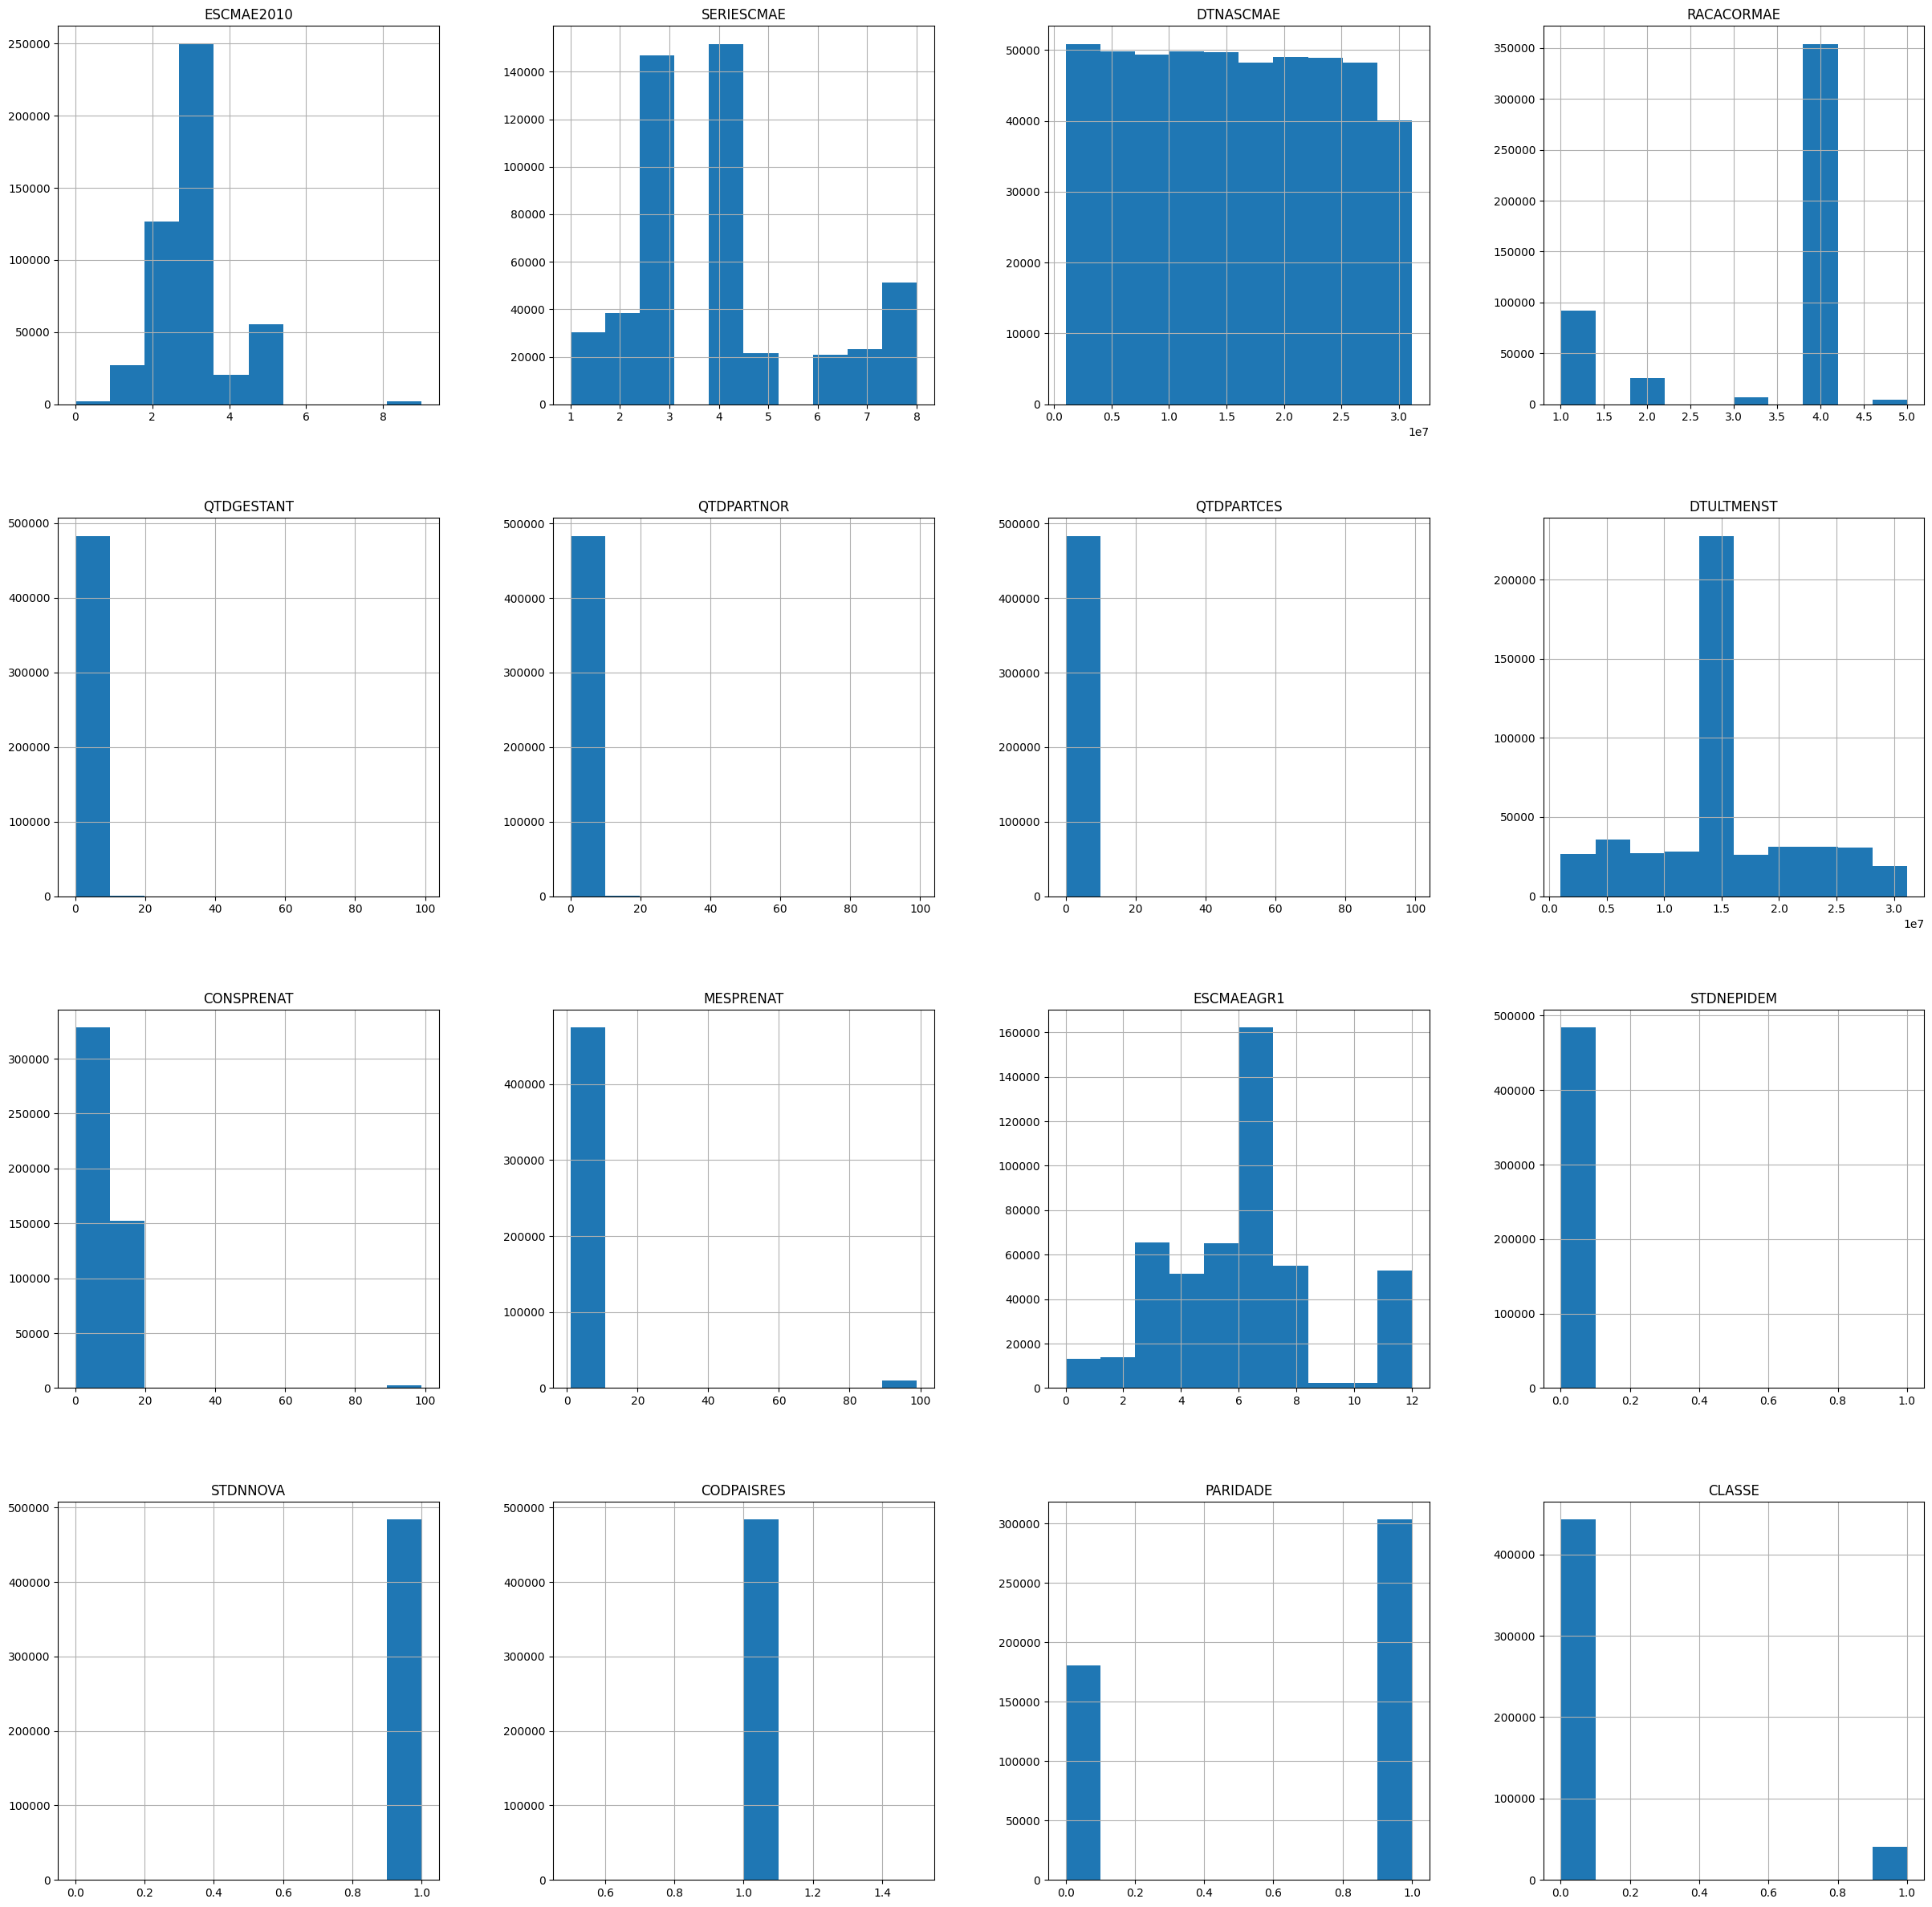

In [46]:
train_df.hist(figsize=(30,30))
plt.show()

In [47]:
train_df['CLASSE'].value_counts()

CLASSE
0    442701
1     41031
Name: count, dtype: int64

In [48]:
X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

# Treinamento dos modelos

# Decision Tree

Melhores parâmetros encontrados: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.62      0.66      0.64     11397
           1       0.64      0.59      0.61     11397

    accuracy                           0.63     22794
   macro avg       0.63      0.63      0.62     22794
weighted avg       0.63      0.63      0.62     22794



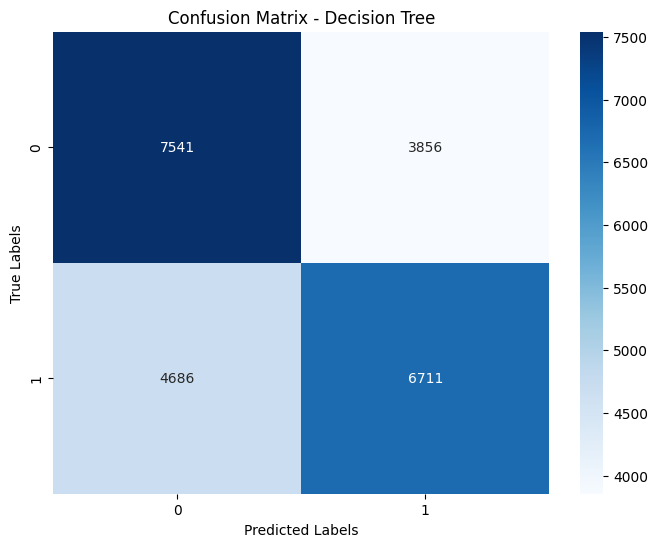

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

param_grid_dt = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10, 15],
        'min_samples_leaf': [1, 2, 4, 10]
  }

dt_model = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train_balanced, y_train_balanced)
best_params_dt = grid_search_dt.best_params_
print("Melhores parâmetros encontrados:", best_params_dt)

best_dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)
best_dt_model.fit(X_train_balanced, y_train_balanced)

y_pred_dt = best_dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap="Blues",
                xticklabels=best_dt_model.classes_,
                yticklabels=best_dt_model.classes_,
                cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Melhor Threshold Calculado: 0.2842
Melhor Recall Correspondente: 1.0000
Precisão Correspondente: 0.5000


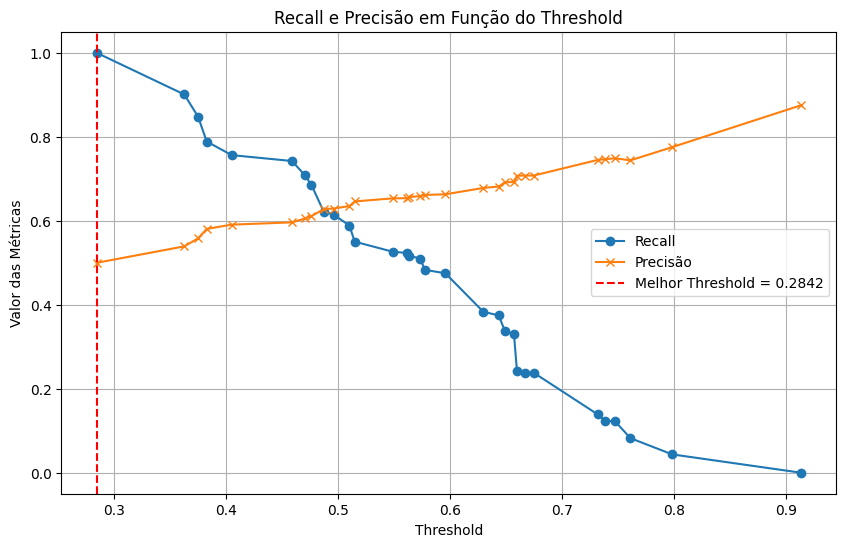

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

unique_thresholds = np.sort(np.unique(y_prob_dt))

precisions = []
recalls = []

for threshold in unique_thresholds:
    y_pred_threshold = (y_prob_dt >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)

best_threshold_index = np.argmax(recalls)
best_threshold = unique_thresholds[best_threshold_index]
best_recall = recalls[best_threshold_index]
best_precision = precisions[best_threshold_index]

print(f"Melhor Threshold Calculado: {best_threshold:.4f}")
print(f"Melhor Recall Correspondente: {best_recall:.4f}")
print(f"Precisão Correspondente: {best_precision:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(unique_thresholds, recalls, label='Recall', marker='o')
plt.plot(unique_thresholds, precisions, label='Precisão', marker='x')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Melhor Threshold = {best_threshold:.4f}")
plt.xlabel('Threshold')
plt.ylabel('Valor das Métricas')
plt.title('Recall e Precisão em Função do Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

threshold = 0.42
y_pred_threshold = (y_prob_dt >= threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = precision
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
correctly_classified = accuracy * len(y_test)

print(f"Threshold Utilizado: {threshold:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (PPV): {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"PPV: {ppv:.4f}")
print(f"NPV: {npv:.4f}")
print(f"FPR (Taxa de Falsos Positivos): {fpr:.4f}")
print(f"Classificados Corretamente: {correctly_classified:.0f} de {len(y_test)}")

thresholds_f1 = np.sort(np.unique(y_prob_dt))
f1_scores = []

for t in thresholds_f1:
    y_pred_dt = (y_prob_dt >= t).astype(int)
    f1 = f1_score(y_test, y_pred_dt)
    f1_scores.append(f1)

Threshold Utilizado: 0.4200
Acurácia: 0.6199
Precisão (PPV): 0.5963
Recall (Sensibilidade): 0.7423
F1-Score: 0.6613
Especificidade: 0.4974
PPV: 0.5963
NPV: 0.6587
FPR (Taxa de Falsos Positivos): 0.5026
Classificados Corretamente: 14129 de 22794


# Random Forest

Melhores parâmetros encontrados: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11397
           1       0.00      0.00      0.00     11397

    accuracy                           0.50     22794
   macro avg       0.25      0.50      0.33     22794
weighted avg       0.25      0.50      0.33     22794



c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

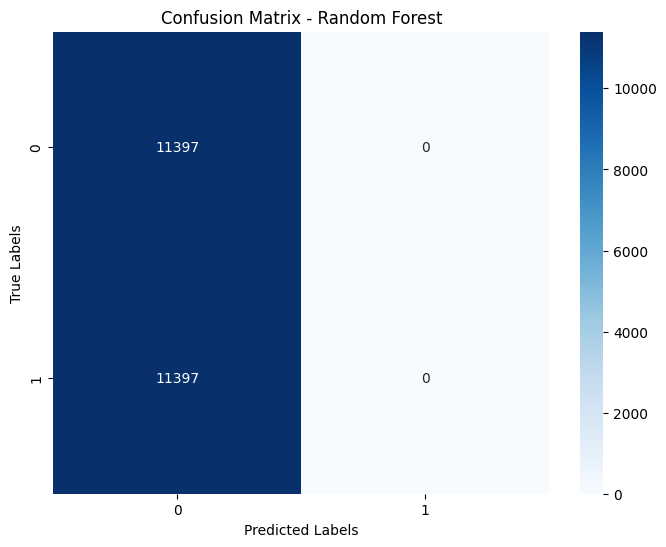

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

param_grid_rf = {
    'n_estimators': [5, 10, 20],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print("Melhores parâmetros encontrados:", best_params_rf)

best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues",
            xticklabels=best_rf_model.classes_,
            yticklabels=best_rf_model.classes_,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Melhor Threshold Calculado: 0.0263
Melhor Recall Correspondente: 1.0000
Precisão Correspondente: 0.5000


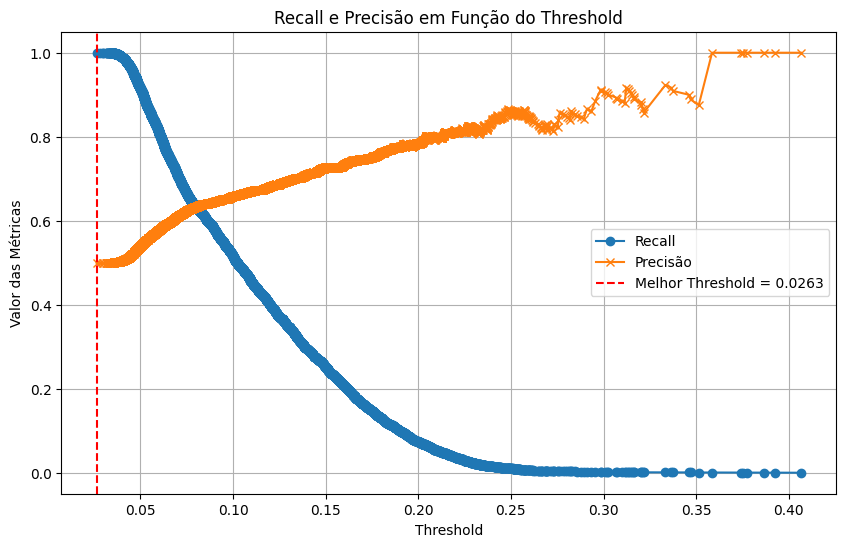

Relatório de Classificação (Random Forest):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11397
           1       0.50      1.00      0.67     11397

    accuracy                           0.50     22794
   macro avg       0.25      0.50      0.33     22794
weighted avg       0.25      0.50      0.33     22794



c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\annab\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

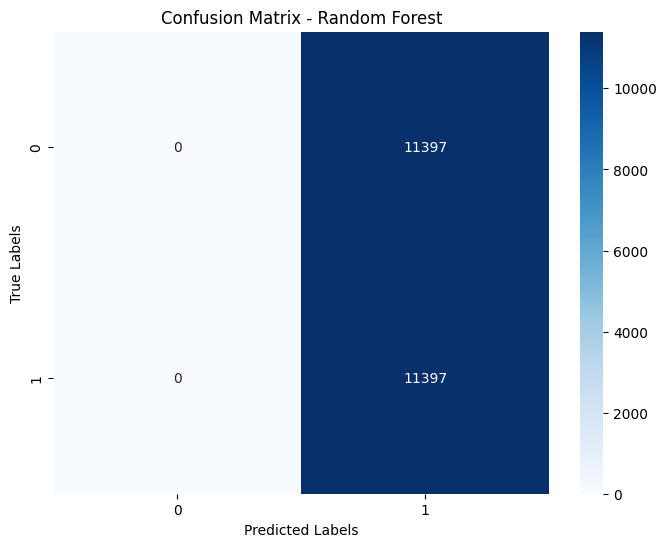

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

unique_thresholds = np.sort(np.unique(y_prob_rf))

precisions = []
recalls = []

for threshold in unique_thresholds:
    y_pred_threshold = (y_prob_rf >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)

best_threshold_index = np.argmax(recalls)
best_threshold = unique_thresholds[best_threshold_index]
best_recall = recalls[best_threshold_index]
best_precision = precisions[best_threshold_index]

print(f"Melhor Threshold Calculado: {best_threshold:.4f}")
print(f"Melhor Recall Correspondente: {best_recall:.4f}")
print(f"Precisão Correspondente: {best_precision:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(unique_thresholds, recalls, label='Recall')
plt.plot(unique_thresholds, precisions, label='Precisão')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Melhor Threshold = {best_threshold:.4f}")
plt.xlabel('Threshold')
plt.ylabel('Valor das Métricas')
plt.title('Recall e Precisão em Função do Threshold')
plt.legend()
plt.grid(True)
plt.show()

y_pred_rf_threshold = (y_prob_rf >= best_threshold).astype(int)

print("Relatório de Classificação (Random Forest):")
print(classification_report(y_test, y_pred_rf_threshold))

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

y_pred_rf = best_rf_model.predict_proba(X_test)[:, 1]

threshold = 0.08
y_pred_threshold = (y_pred_rf >= threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = precision
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
correctly_classified = accuracy * len(y_test)

print(f"Threshold Utilizado: {threshold:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (PPV): {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"PPV: {ppv:.4f}")
print(f"NPV: {npv:.4f}")
print(f"FPR (Taxa de Falsos Positivos): {fpr:.4f}")
print(f"Classificados Corretamente: {correctly_classified:.0f} de {len(y_test)}")

thresholds_f1 = np.sort(np.unique(y_prob_dt))
f1_scores = []

for t in thresholds_f1:
    y_pred_dt = (y_prob_dt >= t).astype(int)
    f1 = f1_score(y_test, y_pred_dt)
    f1_scores.append(f1)

Threshold Utilizado: 0.0800
Acurácia: 0.6329
Precisão (PPV): 0.6330
Recall (Sensibilidade): 0.6328
F1-Score: 0.6329
Especificidade: 0.6331
PPV: 0.6330
NPV: 0.6329
FPR (Taxa de Falsos Positivos): 0.3669
Classificados Corretamente: 14427 de 22794


# SVM

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']
X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

svm = SVC(C=1, gamma='scale', kernel='rbf') 

svm.fit(X_train_balanced, y_train_balanced)
y_pred = svm.predict(X_test)

print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Acurácia no conjunto de teste: 0.5236904448539089
              precision    recall  f1-score   support

           0       0.52      0.75      0.61     11397
           1       0.54      0.30      0.39     11397

    accuracy                           0.52     22794
   macro avg       0.53      0.52      0.50     22794
weighted avg       0.53      0.52      0.50     22794



Melhor Threshold Calculado: 0.4538
Melhor Recall Correspondente: 1.0000
Precisão Correspondente: 0.5000


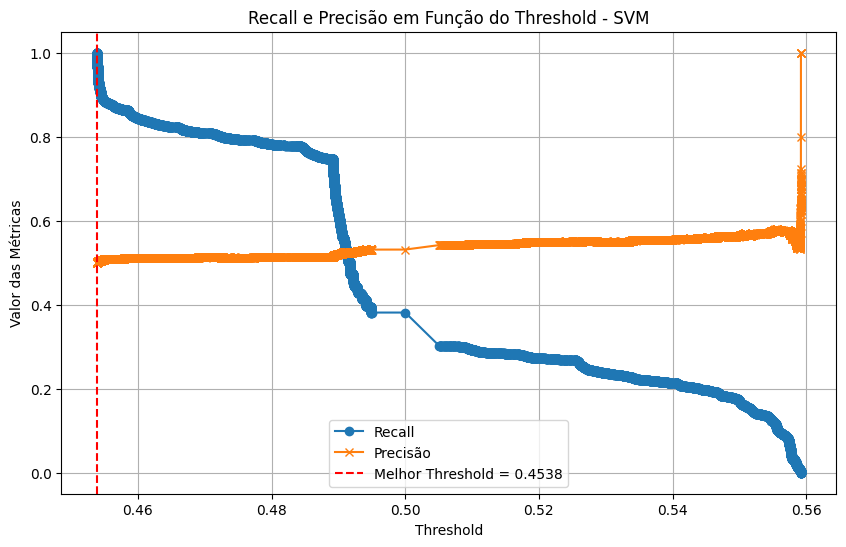

In [69]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler

svm = SVC(C=1, gamma='scale', kernel='rbf', probability=True)  
svm.fit(X_train_balanced, y_train_balanced)

y_prob_svm = svm.predict_proba(X_test)[:, 1]  

unique_thresholds = np.sort(np.unique(y_prob_svm))

precisions = []
recalls = []

for threshold in unique_thresholds:
    y_pred_threshold = (y_prob_svm >= threshold).astype(int)
    
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)

best_threshold_index = np.argmax(recalls)
best_threshold = unique_thresholds[best_threshold_index]
best_recall = recalls[best_threshold_index]
best_precision = precisions[best_threshold_index]

print(f"Melhor Threshold Calculado: {best_threshold:.4f}")
print(f"Melhor Recall Correspondente: {best_recall:.4f}")
print(f"Precisão Correspondente: {best_precision:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(unique_thresholds, recalls, label='Recall', marker='o')
plt.plot(unique_thresholds, precisions, label='Precisão', marker='x')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f"Melhor Threshold = {best_threshold:.4f}")
plt.xlabel('Threshold')
plt.ylabel('Valor das Métricas')
plt.title('Recall e Precisão em Função do Threshold - SVM')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

y_prob_svm = best_rf_model.predict_proba(X_test)[:, 1]

threshold = 0.1
y_pred_threshold = (y_prob_svm >= threshold).astype(int)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()

accuracy = accuracy_score(y_test, y_pred_threshold)
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = precision
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
correctly_classified = accuracy * len(y_test)

print(f"Threshold Utilizado: {threshold:.4f}")
print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão (PPV): {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Especificidade: {specificity:.4f}")
print(f"PPV: {ppv:.4f}")
print(f"NPV: {npv:.4f}")
print(f"FPR (Taxa de Falsos Positivos): {fpr:.4f}")
print(f"Classificados Corretamente: {correctly_classified:.0f} de {len(y_test)}")

thresholds_f1 = np.sort(np.unique(y_prob_dt))
f1_scores = []

for t in thresholds_f1:
    y_pred_dt = (y_prob_dt >= t).astype(int)
    f1 = f1_score(y_test, y_pred_dt)
    f1_scores.append(f1)

Threshold Utilizado: 0.1000
Acurácia: 0.6245
Precisão (PPV): 0.6593
Recall (Sensibilidade): 0.5152
F1-Score: 0.5784
Especificidade: 0.7337
PPV: 0.6593
NPV: 0.6021
FPR (Taxa de Falsos Positivos): 0.2663
Classificados Corretamente: 14234 de 22794


# Combinação dos modelos por voto

Acurácia no conjunto de teste: 0.6308493214787084
              precision    recall  f1-score   support

           0       0.63      0.65      0.64     17096
           1       0.64      0.61      0.62     17096

    accuracy                           0.63     34192
   macro avg       0.63      0.63      0.63     34192
weighted avg       0.63      0.63      0.63     34192



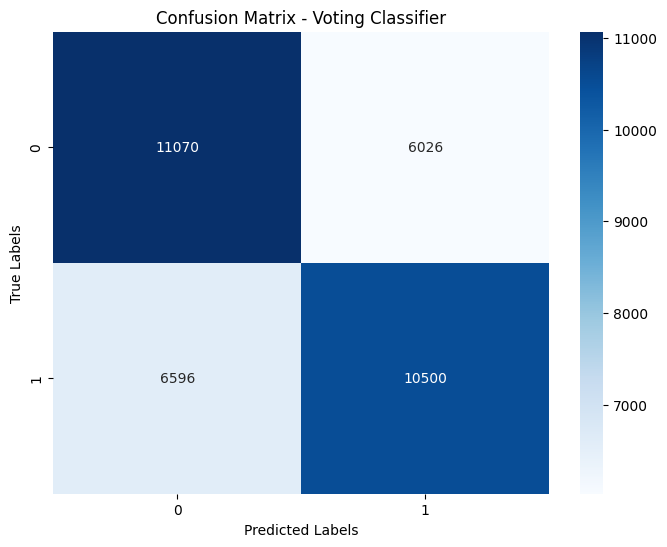

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

# Separação dos dados
X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']
X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)
rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
svm_model = SVC(C=1, gamma='scale', kernel='rbf') 

voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', dt_model),
    ('random_forest', rf_model),
    ('svm', svm_model)
], voting='hard')  

voting_classifier.fit(X_train_balanced, y_train_balanced)
y_pred_voting = voting_classifier.predict(X_test)

print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred_voting)}")
print(classification_report(y_test, y_pred_voting))

conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap="Blues",
            xticklabels=voting_classifier.classes_,
            yticklabels=voting_classifier.classes_,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()


# Combinação dos modelos por stacking

Acurácia no conjunto de teste: 0.6310832943378568
              precision    recall  f1-score   support

           0       0.63      0.64      0.63     17096
           1       0.63      0.62      0.63     17096

    accuracy                           0.63     34192
   macro avg       0.63      0.63      0.63     34192
weighted avg       0.63      0.63      0.63     34192



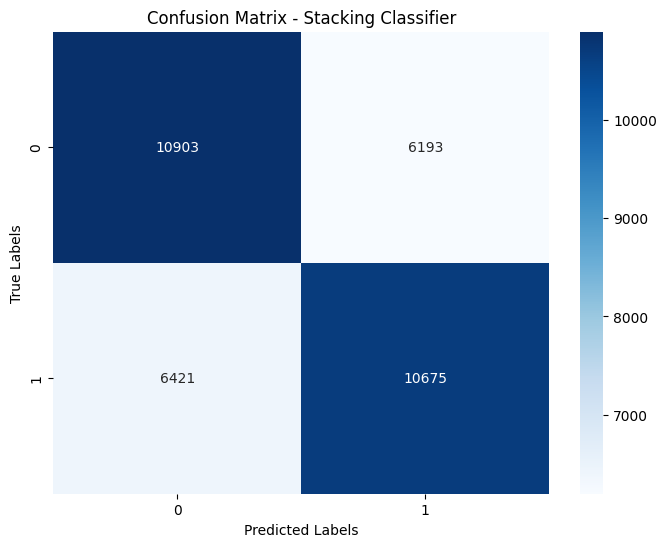

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

X_train = train_df.drop(columns=['CLASSE'])
y_train = train_df['CLASSE']
X_test = test_df.drop(columns=['CLASSE'])
y_test = test_df['CLASSE']

undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)
rf_model = RandomForestClassifier(random_state=42, **best_params_rf)
svm_model = SVC(C=1, gamma='scale', kernel='rbf') 


meta_model = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=[('decision_tree', dt_model), 
                ('random_forest', rf_model), 
                ('svm', svm_model)],
    final_estimator=meta_model
)

stacking_classifier.fit(X_train_balanced, y_train_balanced)

y_pred_stacking = stacking_classifier.predict(X_test)

print(f"Acurácia no conjunto de teste: {accuracy_score(y_test, y_pred_stacking)}")
print(classification_report(y_test, y_pred_stacking))

conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap="Blues",
            xticklabels=stacking_classifier.classes_,
            yticklabels=stacking_classifier.classes_,
            cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()
